In [1]:
import pandas as pd
import numpy as np
import random as rd
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import seaborn as sns
import umap.umap_ as umap  # 正确导入UMAP
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import RidgeClassifierCV,SGDClassifier,PassiveAggressiveClassifier,Perceptron
from sklearn.svm import LinearSVC,SVC

# 通过模型生成的新特征后进行可视化

## 载入数据

In [27]:
# 载入数据集
data = "./20240820 对数加一训练集和测试集.xlsx"

# 载入训练集
dataset = pd.DataFrame(pd.read_excel(data, sheet_name="训练集"))
x_train = dataset[dataset.columns[1:]]
y_train = dataset[['Group']].values.ravel()  # 使用ravel()将y_train转换为一维数组

# 载入测试集
dataset_test = pd.DataFrame(pd.read_excel(data, sheet_name="测试集"))
x_test = dataset_test[dataset_test.columns[1:]]
y_test = dataset_test[['Group']].values.ravel()  # 使用ravel()将y_test转换为一维数组

In [28]:
feature_list = ['Gender', 'PCT', 'Cough', 'Fever', 'IBIL', 'PLT', 'AST', 'CRP', 'γ-GT', 'ALP']
feature_list = feature_list[0:10]
x_train = x_train[feature_list]
x_test = x_test[feature_list]
print(x_train.shape)

(300, 10)


## AdaBoostClassifier

In [58]:
best_params = {'algorithm': 'SAMME.R', 'learning_rate':0.18999999999999995, 'n_estimators': 445}# shap5

# 创建模型实例并应用超参数
model = AdaBoostClassifier(**best_params, random_state=1)

model.fit(x_train, y_train)

# 使用predict_proba获得分类概率
transformed_X_train = model.predict_proba(x_train)
transformed_X_test = model.predict_proba(x_test)


In [59]:
# 假设 new_features 是模型产生的二维特征，y_train 是标签
# 将二维特征和标签结合成 DataFrame
feature_df = pd.DataFrame(transformed_X_train, columns=['prob0', 'prob1'])
feature_df['Group'] = y_train  # 添加标签列

In [60]:
dataset = 'shap5特征-train'
title = 'train'

In [61]:
feature_df.to_excel(f'样本分布可视化/{dataset}-拟合.xlsx', index=False)

In [4]:
#feature_df = pd.DataFrame(pd.read_excel('/Users/louhao/Desktop/可视化数据及其图片-8.26.23.56/点图/32特征机器学习拟合结果/32特征机器学习拟合后的点坐标.xlsx',
                                    #sheet_name = 'train'))

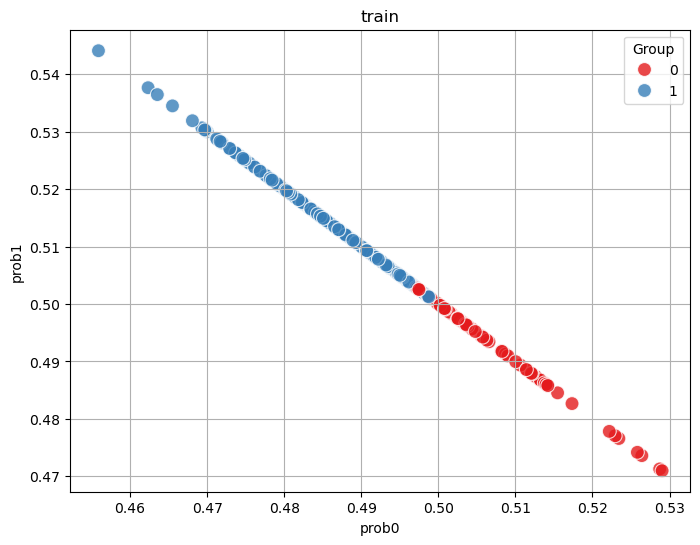

In [62]:
# 绘制散点图
plt.figure(figsize=(8, 6))
sns.scatterplot(x='prob0', y='prob1', hue='Group', data=feature_df, palette='Set1', s=100, alpha=0.8)
plt.title(f'{title}')
plt.xlabel('prob0')
plt.ylabel('prob1')
plt.legend(title='Group')
plt.grid(True)
plt.savefig(f'样本分布可视化/{dataset}-拟合.png', dpi=300, bbox_inches='tight')
plt.show()


In [55]:
def plot_new_features(transformed_X_train, y_train, title):
    if transformed_X_train.ndim == 2 and transformed_X_train.shape[1] == 2:
        # 适用于二维数据的散点图
        feature_df = pd.DataFrame(transformed_X_train, columns=['Feature1', 'Feature2'])
        feature_df['Group'] = y_train  # 添加标签列

        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='Feature1', y='Feature2', hue='Group', data=feature_df, palette='Set1', s=100, alpha=0.8)
        plt.title(title)
        plt.xlabel('Feature1')
        plt.ylabel('Feature2')
        plt.legend(title='Group')
        plt.grid(True)
        plt.show()
        
    elif transformed_X_train.ndim == 1 or (transformed_X_train.ndim == 2 and transformed_X_train.shape[1] == 1):
        # 适用于一维数据的图表
        feature_df = pd.DataFrame(transformed_X_train, columns=['Feature1'])
        feature_df['Group'] = y_train  # 添加标签列

        plt.figure(figsize=(8, 6))
        sns.stripplot(x='Group', y='Feature1', hue='Group', data=feature_df, palette='Set1', size=10, alpha=0.8, jitter=True, legend=False)
        plt.title(title)
        plt.xlabel('Group')
        plt.ylabel('Feature1')
        plt.grid(True)
        plt.show()

    else:
        raise ValueError("transformed_X_train must be either 1D or 2D with 2 columns")


## RandomForestClassifier

In [4]:
best_params = {'criterion': 'gini', 'max_depth': 11, 'max_features': 0.7000000000000001, 'n_estimators': 87}
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(x_train, y_train)
# 使用 apply 方法提取树的叶节点索引作为新的特征
#transformed_X_train = rf_model.apply(x_train)
#transformed_X_test = rf_model.apply(x_test)
#使用 predict_proba 提取类别概率作为新特征
transformed_X_train = rf_model.predict_proba(x_train)
transformed_X_test = rf_model.predict_proba(x_test)
transformed_X_train.shape

In [31]:
# 假设 new_features 是模型产生的二维特征，y_train 是标签
# 将二维特征和标签结合成 DataFrame
feature_df = pd.DataFrame(transformed_X_train, columns=['prob0', 'prob1'])
feature_df['Group'] = y_train  # 添加标签列
feature_df['Sample_Index'] = feature_df.index
feature_df.drop(columns='prob0', inplace=True)
feature_df.head()

,prob1,Group,Sample_Index
0,0.859674,1,0
1,0.882250,1,1
2,0.914675,1,2
3,0.274462,0,3
4,0.903735,1,4


In [26]:
#feature_df.to_excel('32-trian.xlsx', index=False)

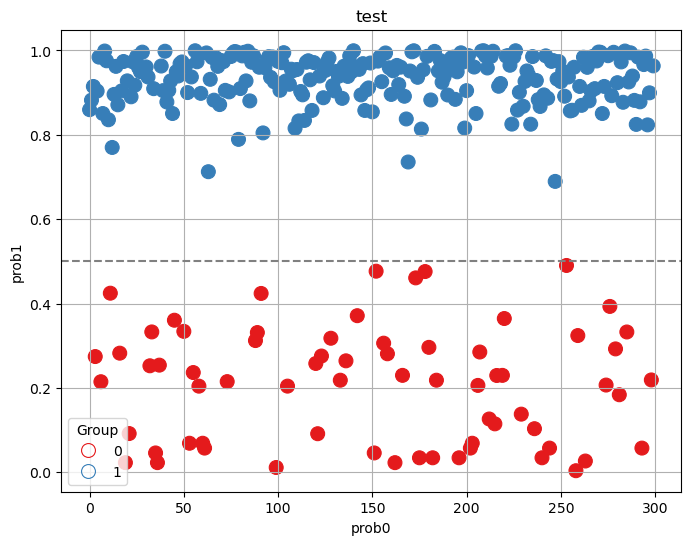

In [24]:
# 绘制概率分布散点图
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sample_Index', y='prob1', hue='Group', data=feature_df, palette='Set1', s=100, edgecolor=None,facecolors='none')
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5)  # 添加水平虚线
plt.title('test')
plt.xlabel('Sample_Index')
plt.ylabel('prob1')
plt.legend(title='Group')
plt.grid(True)
#plt.savefig('32-train.png', dpi=300, bbox_inches='tight')
plt.show()

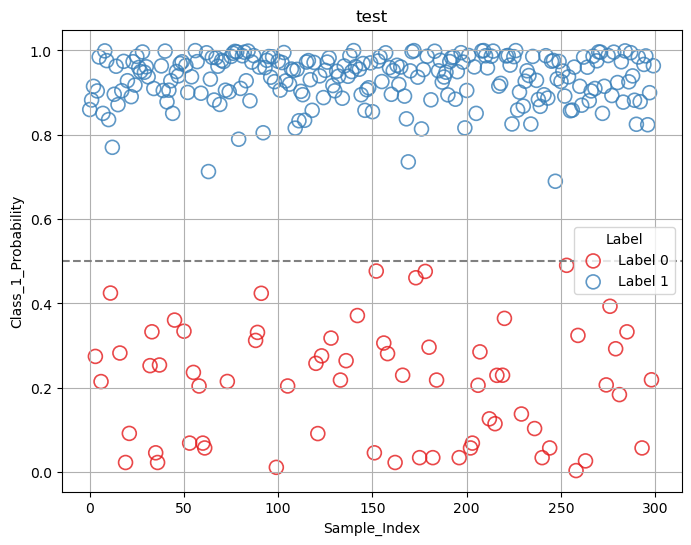

In [34]:
# 绘制概率分布散点图
plt.figure(figsize=(8, 6))

# 使用 scatter 绘制空心圆圈并根据 Group 着色
for name, group in feature_df.groupby('Group'):
    plt.scatter(
        group.index, group['prob1'],
        s=100, facecolors='none', edgecolors=sns.color_palette('Set1')[name],
        alpha=0.8, label=f'Group {name}', linewidth=1.2
    )

plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5)  # 添加水平虚线
plt.title('test')
plt.xlabel('Sample_Index')
plt.ylabel('Class_1_Probability')
plt.legend(title='Group')
plt.grid(True)
#plt.savefig('32-train.png', dpi=300, bbox_inches='tight')
plt.show()


## GradientBoostingClassifier

In [49]:
# 初始化并训练模型
Best_parameters= {'learning_rate': 0.2, 'max_depth': 5, 'max_features': 0.16, 'n_estimators': 96, 'subsample': 0.79}
gb_model = GradientBoostingClassifier(**Best_parameters, random_state=1)
gb_model.fit(x_train, y_train)

# 提取每棵树的叶节点索引作为新特征
#transformed_x_train = gb_model.apply(x_train)
#transformed_x_train = transformed_x_train.reshape(transformed_x_train.shape[0], -1)
# 使用predict_proba提取类别概率作为新特征
transformed_X_train = gb_model.predict_proba(x_train)
transformed_X_test = gb_model.predict_proba(x_test)

In [50]:
# 假设 new_features 是模型产生的二维特征，y_train 是标签
# 将二维特征和标签结合成 DataFrame
feature_df = pd.DataFrame(transformed_X_train, columns=['prob0', 'prob1'])
feature_df['Group'] = y_train  # 添加标签列

In [51]:
dataset = '32特征-train'
title = 'train'

In [52]:
feature_df.to_excel(f'样本分布可视化/{dataset}-拟合.xlsx', index=False)

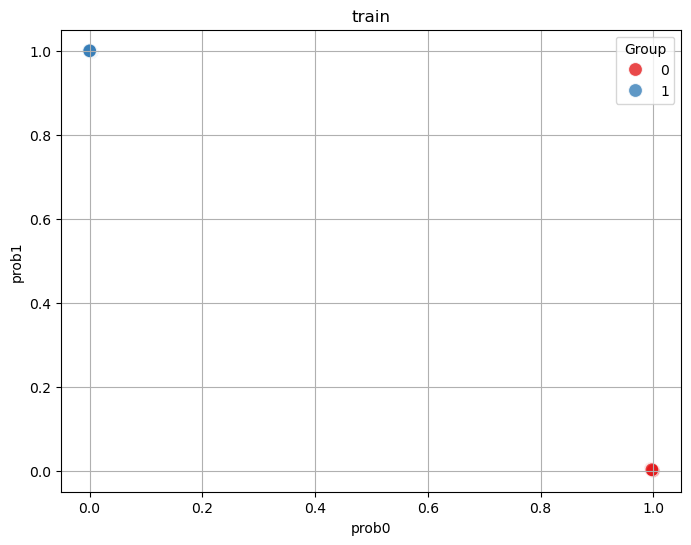

In [53]:
# 绘制散点图
plt.figure(figsize=(8, 6))
sns.scatterplot(x='prob0', y='prob1', hue='Group', data=feature_df, palette='Set1', s=100, alpha=0.8)
plt.title(f'{title}') #修改
plt.xlabel('prob0')
plt.ylabel('prob1')
plt.legend(title='Group')
plt.grid(True)
plt.savefig(f'样本分布可视化/{dataset}-拟合.png', dpi=300, bbox_inches='tight')
plt.show()

## ExtraTreesClassifier

In [62]:
# 假设已经定义了最佳参数
best_params = {'criterion': 'gini', 'max_depth': 11, 'max_features': 0.01, 'n_estimators': 44}

# 初始化并训练模型
et_model = ExtraTreesClassifier(**best_params, random_state=42)
et_model.fit(x_train, y_train)  # 确保y_train是一个一维数组

# 使用predict_proba提取类别概率作为新特征
transformed_X_train = et_model.predict_proba(x_train)

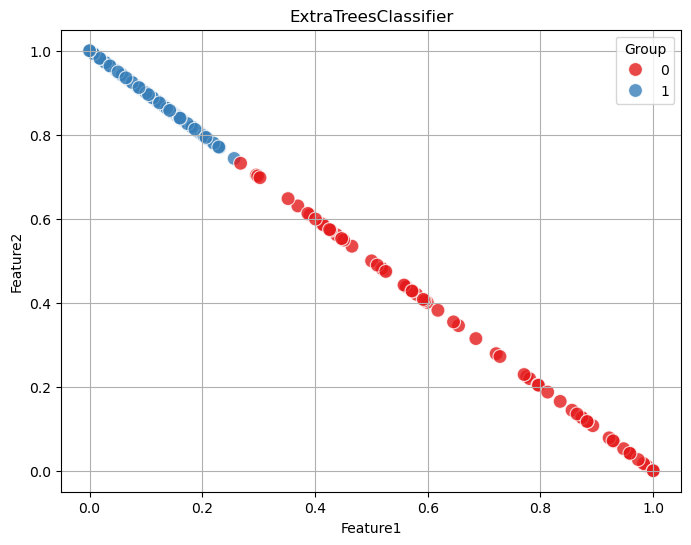

In [63]:
plot_new_features(transformed_X_train, y_train, title="ExtraTreesClassifier")

## DecisionTreeClassifier

In [64]:
# 初始化和训练模型
best_params = {'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'splitter': 'best'}
dt_model = DecisionTreeClassifier(**best_params, random_state=42)
dt_model.fit(x_train, y_train)

# 使用 predict_proba 提取类别概率作为新特征
transformed_X_train = dt_model.predict_proba(x_train)

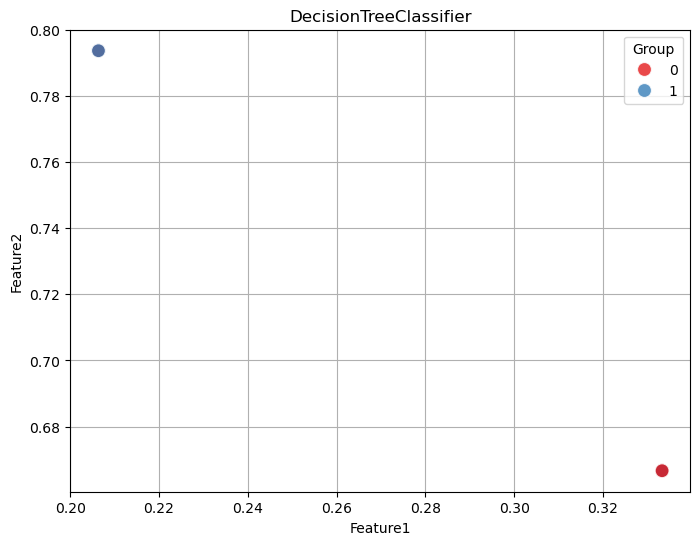

In [65]:
plot_new_features(transformed_X_train, y_train, title="DecisionTreeClassifier")

## BernoulliNB

In [66]:
# 假设 x_train 和 y_train 已经定义，并且已经进行了标准化处理
# 1. 训练 BernoulliNB 模型
best_params = {'alpha': 14.141414141414142, 'binarize': 2.6262626262626263, 'class_prior': None, 'fit_prior': True}

bernoulli_nb_model = BernoulliNB(**best_params)
bernoulli_nb_model.fit(x_train, y_train)

# 2. 提取新特征
# 提取类别概率作为新特征
# `predict_proba` 返回每个样本属于各个类别的概率
new_features_proba = bernoulli_nb_model.predict_proba(x_train)

# 将新特征转换为 DataFrame
#proba_df = pd.DataFrame(new_features_proba, columns=[f'Class_{i}' for i in range(new_features_proba.shape[1])])
#proba_df['Group'] = y_train

# 选择合适的特征进行后续分析或模型训练

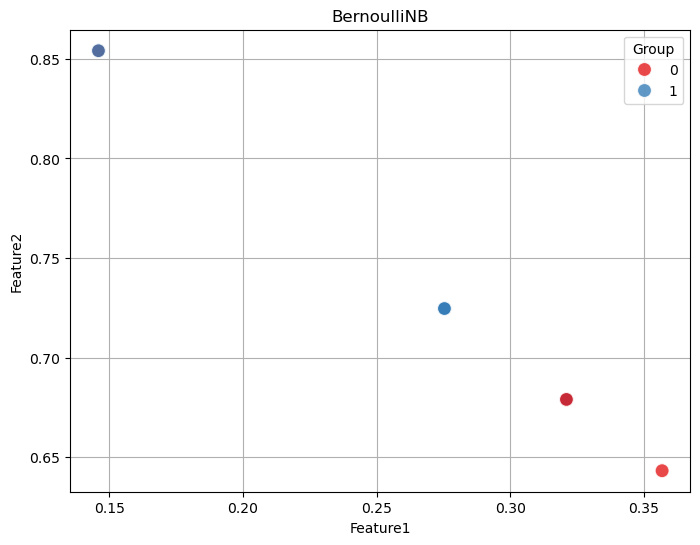

In [67]:
plot_new_features(new_features_proba, y_train, title="BernoulliNB")

## 模型产生的特征只有一维

### RidgeClassifierCV

In [68]:
# 初始化并训练 RidgeClassifierCV 模型
best_params = {'alphas': 38.0, 'fit_intercept': True}
ridge_model = RidgeClassifierCV(**best_params)
ridge_model.fit(x_train, y_train)

# 使用 decision_function 提取类别得分作为新特征
transformed_X_train = ridge_model.decision_function(x_train)
transformed_X_train = transformed_X_train.reshape(-1, 1)  # 转换为二维数组

In [69]:
transformed_X_train.shape

(300, 1)

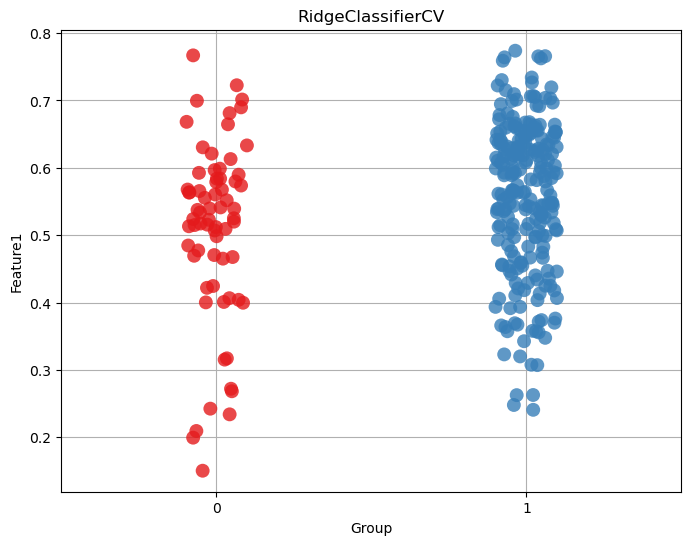

In [70]:
plot_new_features(transformed_X_train, y_train, title="RidgeClassifierCV")

### SGDClassifier

In [29]:
best_params = {'alpha': 0.04, 'fit_intercept': False, 'l1_ratio': 0.1, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l1'}
sgd_classifier = SGDClassifier(**best_params)
sgd_classifier.fit(x_train, y_train)

SGDClassifier(alpha=0.04, fit_intercept=False, l1_ratio=0.1,
              loss='epsilon_insensitive', penalty='l1')

In [32]:
# 提取决策函数值作为新特征
# 注意：`decision_function` 对于二分类返回的是决策值，对多分类返回的是每个类别的决策值
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

dataset_name = 'train'
decision_values = sgd_classifier.decision_function(eval(f'x_{dataset_name}'))
prob1 = sigmoid(decision_values)
feature_df = pd.DataFrame(prob1, columns=['prob1'])
feature_df['prob0'] = 1-feature_df.loc[:,'prob1']
feature_df['Group'] = eval(f'y_{dataset_name}')
#model_name = type(model).__name__
#print(model_name)
#feature_df.to_excel(f'/Users/louhao/Desktop/16支队新增或有补充的图片1008/Umap降维、机器学习拟合后的可视化/permutation10特征/permutation10特征-{dataset_name}-拟合.xlsx', index=False)
feature_df.head()


,prob1,prob0,Group
0,0.727148,0.272852,1
1,0.703361,0.296639,1
2,0.726291,0.273709,1
3,0.724155,0.275845,0
4,0.697710,0.302290,1


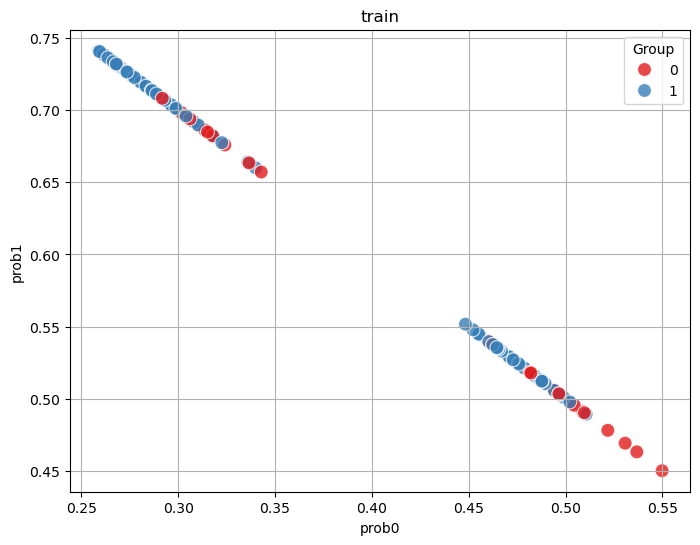

In [33]:
# 绘制散点图
plt.figure(figsize=(8, 6))
sns.scatterplot(x='prob0', y='prob1', hue='Group', data=feature_df, palette='Set1', s=100, alpha=0.8)
plt.title(f'{dataset_name}')
plt.xlabel('prob0')
plt.ylabel('prob1')
plt.legend(title='Group')
plt.grid(True)
#plt.savefig(f'/Users/louhao/Desktop/16支队新增或有补充的图片1008/Umap降维、机器学习拟合后的可视化/permutation10特征/permutation10特征-{dataset_name}-拟合.png', dpi=300, bbox_inches='tight')
plt.show()


### Perceptron

In [76]:
# 假设 x_train 和 y_train 已经定义，并且已经进行了标准化处理
# 1. 训练 Perceptron 模型
perceptron_model = Perceptron()
perceptron_model.fit(x_train, y_train)

# 2. 提取新特征
# 提取决策函数值作为新特征
# `decision_function` 对于二分类问题返回每个样本的决策值
# 对于多分类问题，返回每个样本的每个类别的决策值
new_features_decision = perceptron_model.decision_function(x_train)



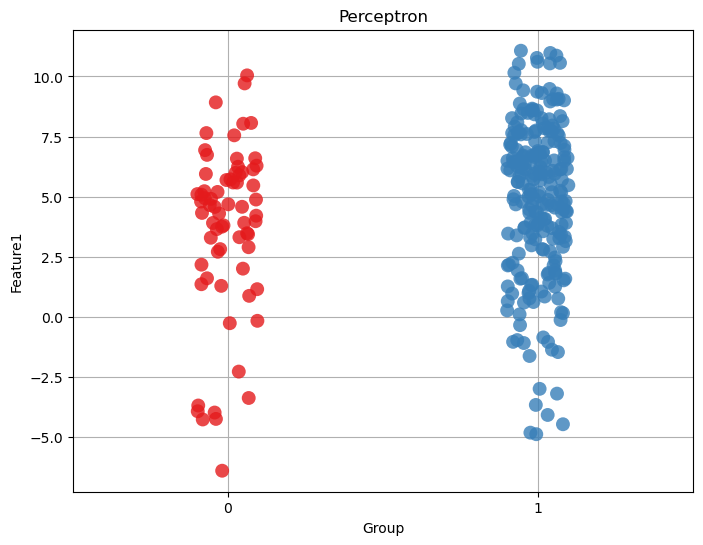

In [77]:
plot_new_features(new_features_decision, y_train, title="Perceptron")

In [ ]:
plot_new_features(transformed_X_train, y_train, title="GradientBoostingClassifier")

### LinearSVC

In [78]:
linear_svc_model = LinearSVC()
linear_svc_model.fit(x_train, y_train)

# 2. 提取新特征
# 提取决策函数值作为新特征
# `decision_function` 返回每个样本的决策值
new_features_decision = linear_svc_model.decision_function(x_train)


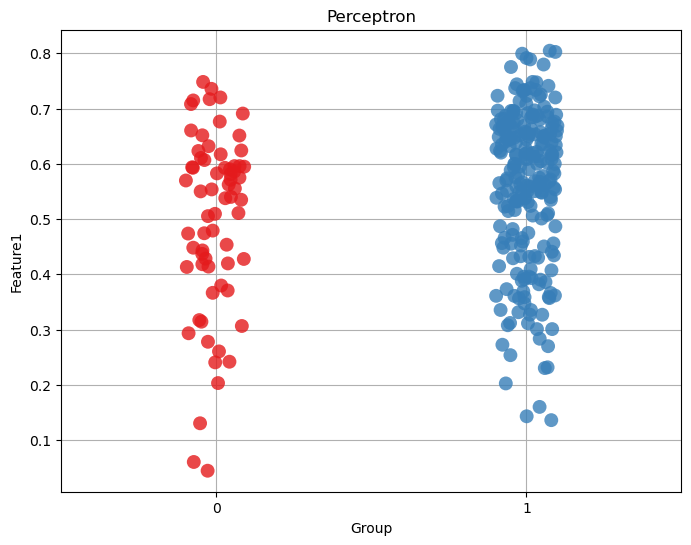

In [79]:
plot_new_features(new_features_decision, y_train, title="Perceptron")

### SVC

In [80]:
# 1. 训练 SVC 模型
best_params = {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
svc_model = SVC(**best_params, random_state=42)  # 设置 probability=True 以启用 predict_proba 方法
svc_model.fit(x_train, y_train)

# 2. 提取新特征
# 提取类别概率作为新特征
#new_features_proba = svc_model.predict_proba(x_train)

# 提取决策函数值作为新特征
new_features_decision = svc_model.decision_function(x_train)

# 将新特征转换为 DataFrame
# 对于概率特征
#proba_df = pd.DataFrame(new_features_proba, columns=[f'Class_{i}' for i in range(new_features_proba.shape[1])])
#proba_df['Group'] = y_train.values


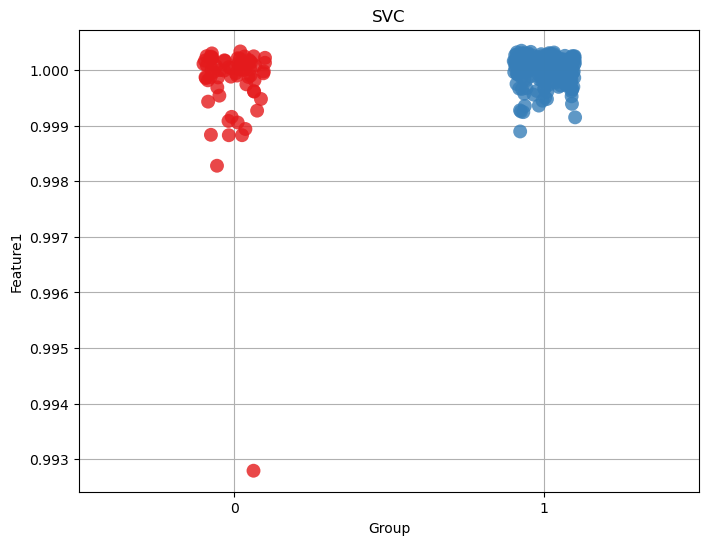

In [81]:
plot_new_features(new_features_decision, y_train, title="SVC")

### PassiveAggressiveClassifier

In [84]:
# 假设 x_train 和 y_train 已经定义，并且已经进行了标准化处理
# 1. 训练 PassiveAggressiveClassifier 模型
best_params = {'C': 0.015, 'fit_intercept': True}
pac_model = PassiveAggressiveClassifier(**best_params)
pac_model.fit(x_train, y_train)

# 2. 提取新特征
# 提取决策函数值作为新特征
# `decision_function` 对于二分类返回每个样本的决策值，对多分类返回每个样本的每个类别的决策值
new_features_decision = pac_model.decision_function(x_train)


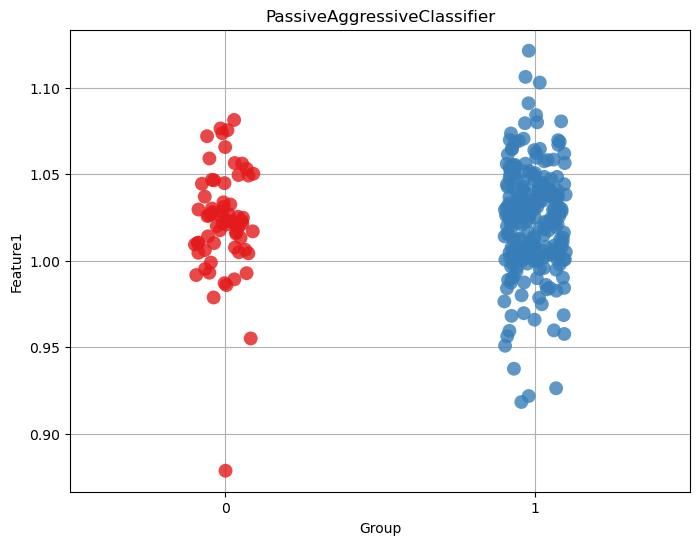

In [85]:
plot_new_features(new_features_decision, y_train, title="PassiveAggressiveClassifier")